# AGENDA

To Build Following models and understand performance of each of the models

    1. Simple Linear Regression Model

    2. Multiple Linear Regression Model with only few of the attributes

    3. Multiple Linear Regression Model with all attributes

    4. Multiple Linear Regression Model without outliers

    5. Multiple Linear Regression Model after Standardization

    6. Multiple Linear Regression Model after feature elimination using VIF

    7. Multiple Linear Regression Model after feature elimination using RFE



## Business Problem

Ecommerce company based in a City that sells clothing online but they also have in-store style and clothing advice sessions. 
Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to <b> Decide whether to focus their efforts on their mobile app experience or their website. </b>


## About the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

## Loading the required modules 
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn

In [ ]:
# Mounting google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customers = pd.read_csv("/content/drive/My Drive/Statistical_Modelling/2_MLR/Ecommerce_Customers.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [ ]:
customers.shape # records and columns

(500, 9)

In [ ]:
customers.head() # snapshot of the data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",OliveDrab,34.374258,15.126994,37.157624,5.377594,765.518462,Female
1,asilva@yahoo.com,USNV Johnson\nFPO AP 19026,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867,Male
2,william82@gmail.com,"11143 Park Squares\nSamanthatown, UT 97073",SandyBrown,33.256335,13.858062,37.780265,5.976768,725.584814,Male
3,jeffrey54@mcdonald-williams.com,"297 Francis Valley\nSouth Lindsey, NY 13669-5367",Gainsboro,34.967610,13.919494,37.952013,5.066697,712.396327,Female
4,rhonda01@gmail.com,"939 Watson Run\nStaceyberg, VT 58376-0454",Orchid,34.385820,12.729720,36.232110,5.705941,708.935185,Female


In [ ]:
customers.tail() # Last 5 Rows.

In [ ]:
customers.describe() # summary to understand the data, prints the summary only for numeric attributes by default

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,548.814038
std,0.992563,0.994216,1.010489,0.999278,1098.792971
min,29.532429,8.508152,33.913847,0.269901,266.086341
25%,32.341822,11.388153,36.349257,2.930450,445.577927
50%,33.082008,11.983231,37.069367,3.533975,500.120199
75%,33.711985,12.753850,37.716432,4.126502,549.871479
max,36.139662,15.126994,40.005182,6.922689,25006.670580


In [ ]:
customers.info() # To understand the data type for each of the variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [ ]:
customers.describe(include=['O'])

,Email,Address,Avatar,Gender
count,500,500,500,500
unique,500,500,138,2
top,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",Teal,Male
freq,1,1,7,260


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use Plotly to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [ ]:
#!pip install plotly

In [ ]:
import plotly.express as px #importing plotly

In [ ]:
fig = px.scatter(customers, x="Avg. Session Length", y="Yearly Amount Spent",)
fig.show() #plotting scatter plot with "Avg. Session Length","Yearly Amount Spent"

In [ ]:
fig = px.scatter(customers, x="Length of Membership", y="Yearly Amount Spent")
fig.show()#plotting scatter plot with "Length of Membership","Yearly Amount Spent"

In [ ]:
fig = px.scatter(customers, x="Time on Website", y="Yearly Amount Spent")
fig.show() #plotting scatter plot with "Time on Website","Yearly Amount Spent"

### Does the Spend varies depends on the Gender

In [ ]:
customers.groupby('Gender').agg(['mean','min','max', 'std'])['Yearly Amount Spent']


,mean,min,max,std
Gender,,,,
Female,557.200123,501.100245,765.518462,45.242971
Male,541.073037,266.086341,25006.670580,1524.502548


# BOX PLOT NEED TO DO

In [ ]:
condition = customers['Gender'] == 'Female'
customer_m = customers[['Gender','Yearly Amount Spent']].loc[condition,:]
fig = px.box(customer_m, x="Gender", y="Yearly Amount Spent")
fig.show() #plotting boxplot with ""Gender","Yearly Amount Spent""

In [ ]:
fig = px.box(customers, x="Gender", y="Yearly Amount Spent")
fig.show() #plotting boxplot with ""Gender","Yearly Amount Spent""

# Drop Unnecessary Columns

In [ ]:
customers_clean = customers.drop(columns = ['Email','Address','Avatar'],axis=1)
# dropping unneccessary variables such as unique values

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

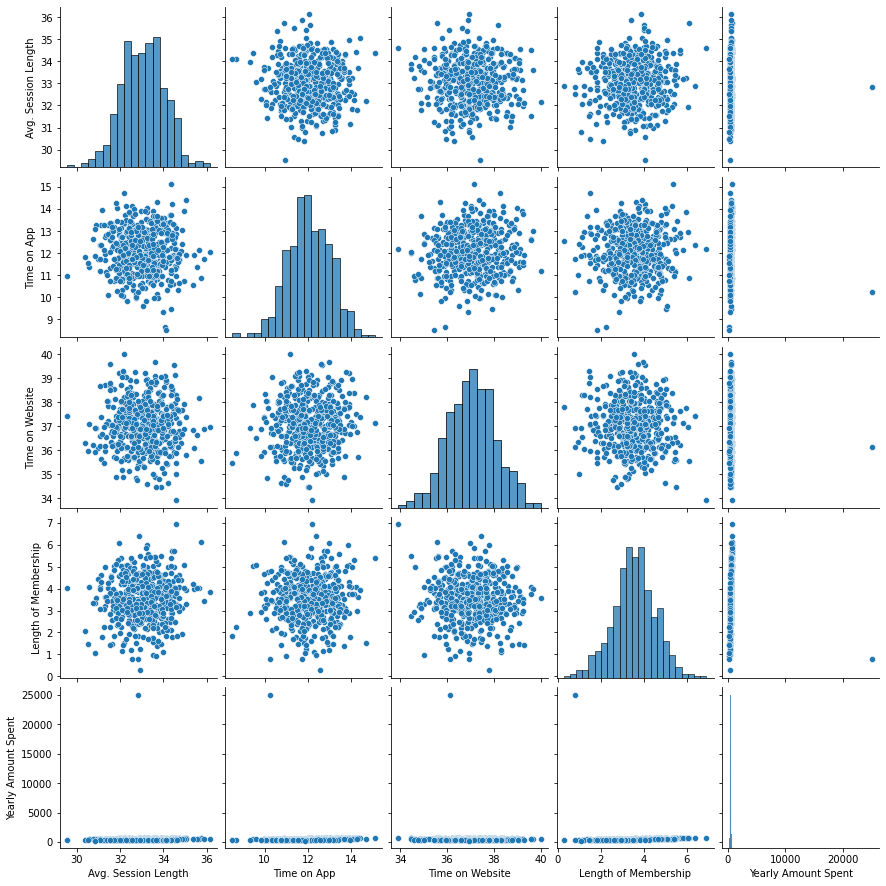

In [ ]:
sns.pairplot(customers_clean) #pair plot 

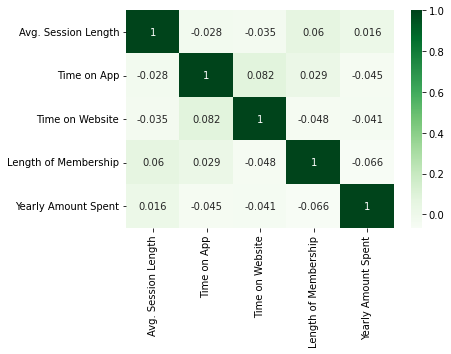

In [ ]:
sns.heatmap(customers.corr(),annot=True,cmap='Greens') #correlation plot

**Based on this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# Length of Membership 

**Create a linear model plot (using plotly's scatter) of  Yearly Amount Spent vs. Length of Membership. **

In [ ]:
fig_with_outliers = px.scatter(customers, x="Length of Membership", y="Yearly Amount Spent",trendline="ols")
fig_with_outliers.show()  

# Data Preparation for model building 

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
customers_clean.head() #snapshot of clean data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,34.374258,15.126994,37.157624,5.377594,765.518462,Female
1,34.603311,12.207298,33.913847,6.922689,744.221867,Male
2,33.256335,13.858062,37.780265,5.976768,725.584814,Male
3,34.967610,13.919494,37.952013,5.066697,712.396327,Female
4,34.385820,12.729720,36.232110,5.705941,708.935185,Female


In [ ]:
customers_clean.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
 5   Gender                500 non-null    object 
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
X = customers_clean.drop(['Yearly Amount Spent'],axis=1) #independent attributes

In [ ]:
X

In [ ]:
y = customers_clean['Yearly Amount Spent'] #dependent attributes

In [ ]:
import statsmodels.api as sm # import stats model o/p : R model
from sklearn.model_selection import train_test_split # importing neccessary modules

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Spilit the data into Training and Testing Data

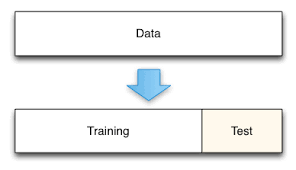

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #train test split


In [ ]:
#print(len(y_train))
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 400
X Train Size: 400
X Test  Size: 100
Y Target Size: 100


In [ ]:
### without Random_state
sample = np.arange(1,11)
print(sample)

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
train_sample,test_sample = train_test_split(sample,test_size=0.2)
print('Train Sample data : ',train_sample)
print('Test Sample data : ',test_sample)

Train Sample data :  [6 9 7 5 4 1 3 2]
Test Sample data :  [10  8]


In [ ]:
### with Random_state
train_sample,test_sample = train_test_split(sample,test_size=0.2,random_state=3452)

In [ ]:
print('Train Sample data : ',train_sample)
print('Test Sample data : ',test_sample)

Train Sample data :  [ 4 10  3  7  1  8  5  2]
Test Sample data :  [6 9]


In [ ]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Gender
18,1.0,33.551699,12.158585,36.575134,5.453969,Female
361,1.0,33.794756,10.982806,34.810631,3.201802,Male
104,1.0,34.330750,13.722454,35.773116,2.909008,Female
4,1.0,34.385820,12.729720,36.232110,5.705941,Female
156,1.0,33.301882,12.542481,38.311365,3.768562,Female


In [ ]:
y_train[:5] #snapshot of Y train

161    534.771485
72     578.241605
246    501.209173
230    505.771140
391    439.891280
Name: Yearly Amount Spent, dtype: float64

## Training the Model

Now its time to train our model on our training data!



`## Simple Regression model - R style`

In [ ]:
model = sm.OLS(y_train, X_train[['const','Length of Membership']])
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     2.822
Date:                 Wed, 01 Feb 2023   Prob (F-statistic):             0.0938
Time:                         06:14:19   Log-Likelihood:                -3410.9
No. Observations:                  400   AIC:                             6826.
Df Residuals:                      398   BIC:                             6834.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

# Errors metrics to evaluate the model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

In [ ]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

# Coefficients

In [ ]:
#definition of coefficient function
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF) 

In [ ]:
coeff

<function __main__.coeff(model_title, modelparams)>

In [ ]:
#get coefficients 
coefficients=pd.DataFrame(results.params)
coefficients.rename(columns = {0:"Simple_Linear_Regression"},inplace = True)
coefficients  

,Simple_Linear_Regression
const,918.678110
Length of Membership,-102.591993


In [ ]:
#Get error metrics
scores = get_metrics(y_train,results.predict(X_train[['const','Length of Membership']]),
                     y_test,results.predict(X_test[['const','Length of Membership']]),
                     "Simple_Linear_Regression",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041


## Multiple Regression model - R style

In [ ]:
X_train.columns  #columns of X train

Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender'],
      dtype='object')

In [ ]:
multiple_reg = sm.OLS(y_train, X_train[['const', 'Avg. Session Length', 'Time on App', 'Time on Website']]).fit()
print(multiple_reg.summary()) #build a model using few of the attributes

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.003
Method:                  Least Squares   F-statistic:                    0.6659
Date:                 Wed, 01 Feb 2023   Prob (F-statistic):              0.573
Time:                         06:14:19   Log-Likelihood:                -3411.3
No. Observations:                  400   AIC:                             6831.
Df Residuals:                      396   BIC:                             6847.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                289

In [ ]:
#get error metrics
scores = get_metrics(y_train,multiple_reg.predict(X_train[['const', 'Avg. Session Length', 'Time on App', 'Time on Website']]),y_test,multiple_reg.predict(X_test[['const', 'Avg. Session Length', 'Time on App', 'Time on Website']]),"Multiple_Linear_Regression",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041
1,Multiple_Linear_Regression,177.786937,1.496543e+06,1223.332743,25.991178,112.847368,19362.964085,139.150868,23.764964,0.005019


In [ ]:
#get coefficients 
coefficients=coeff("Multiple_Linear_Regression",multiple_reg.params)
coefficients

,Simple_Linear_Regression,Multiple_Linear_Regression
const,918.678110,2891.374866
Length of Membership,-102.591993,NaN
Avg. Session Length,NaN,9.789538
Time on App,NaN,-65.450086
Time on Website,NaN,-50.419727


# Multiple Regression model with Categorical Variables




In [ ]:
# Building the Model with Categorical variables. You will get an error . 
# Think why get the ValueError is and We will fix this error soon!
# multiple_reg = sm.OLS(y_train, X_train_reg[['const', 'Gender', 'Time on App', 'Time on Website']]).fit() 
# print(multiple_reg.summary())

# Multiple Regression model with Categorical Variables - Dummification

In [ ]:
# Dummification 
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')

In [ ]:
X_train.head() #snapshot of X train

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Gender_Male
161,1.0,33.119954,12.953263,37.034280,3.472021,0
72,1.0,33.879745,13.587806,38.260353,3.258113,0
246,1.0,33.177205,11.622777,35.968896,3.634094,0
230,1.0,33.477190,12.488067,36.518384,3.345571,0
391,1.0,31.864833,13.443406,36.878315,2.361087,1


In [ ]:
print(X_train.columns)
print("\n")
print(X_test.columns)
print("\n")
print("\n No. of columns in Train Data :{}".format(len(X_train.columns)))
print("\n No. of columns in Test Data :{}".format(len(X_test.columns))) 

Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')


Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')



 No. of columns in Train Data :6

 No. of columns in Test Data :6


In [ ]:
multiple_reg1 = sm.OLS(y_train, X_train).fit()
print(multiple_reg1.summary()) #build a model using all attributes

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.623
Date:                 Wed, 01 Feb 2023   Prob (F-statistic):              0.153
Time:                         06:14:19   Log-Likelihood:                -3408.2
No. Observations:                  400   AIC:                             6828.
Df Residuals:                      394   BIC:                             6852.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [ ]:
#get Coefficients
coefficients=coeff("MLR_with_all_attributes",multiple_reg1.params)
coefficients

,Simple_Linear_Regression,Multiple_Linear_Regression,MLR_with_all_attributes
const,918.678110,2891.374866,5737.188355
Length of Membership,-102.591993,NaN,-190.092504
Avg. Session Length,NaN,9.789538,-23.624124
Time on App,NaN,-65.450086,-112.211093
Time on Website,NaN,-50.419727,-59.778983
Gender_Male,NaN,NaN,-310.159823


In [ ]:
# get error metrics
scores = get_metrics(y_train,multiple_reg1.predict(X_train),y_test,multiple_reg1.predict(X_test),"MLR_with_all_attributes",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041
1,Multiple_Linear_Regression,177.786937,1.496543e+06,1223.332743,25.991178,112.847368,19362.964085,139.150868,23.764964,0.005019
2,MLR_with_all_attributes,229.724320,1.473730e+06,1213.972803,37.417870,174.325335,57371.677489,239.523856,35.573630,0.020186


## Check for Linearity


In [ ]:
from scipy import stats

In [ ]:
#definition of residual plots function
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm
    
    
    fig, ax = plt.subplots(2,2,figsize=(14,10))
    
    ########## Residuals vs fitted - linearity of Errors ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    
    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()
    
    
    ######### qq plot - Normality of Errors ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()
    
    
    ######### Homoscedasticity - Errors Constant Variance ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values')
    ax[1,0].set_title('Scale-Location')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()
    
    
    ######### Cooks distance  - Influential Points ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

In [ ]:
# f = plt.figure(figsize=(14,5))
# ax = f.add_subplot(221)
# sns.scatterplot(y_train,results.fittedvalues,ax=ax,color='r')
# ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# std_residuals = stats.zscore(y_train-results.fittedvalues)
# f = plt.figure(figsize=(14,5))
# ax = f.add_subplot(222)
# sns.scatterplot(results.fittedvalues,std_residuals,ax=ax,color='g')
# ax.set_title('Check for Linearity:\n Predicted value Vs Std.Residuals')



# # Check for Residual normality & mean
# ax = f.add_subplot(223)
# sns.distplot((y_train - results.fittedvalues),ax=ax,color='b')
# ax.axvline((y_train - results.fittedvalues).mean(),color='k',linestyle='--')
# ax.set_title('Check for Residual normality & mean: \n Residual eror');


# Residuals - QQ Plot

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

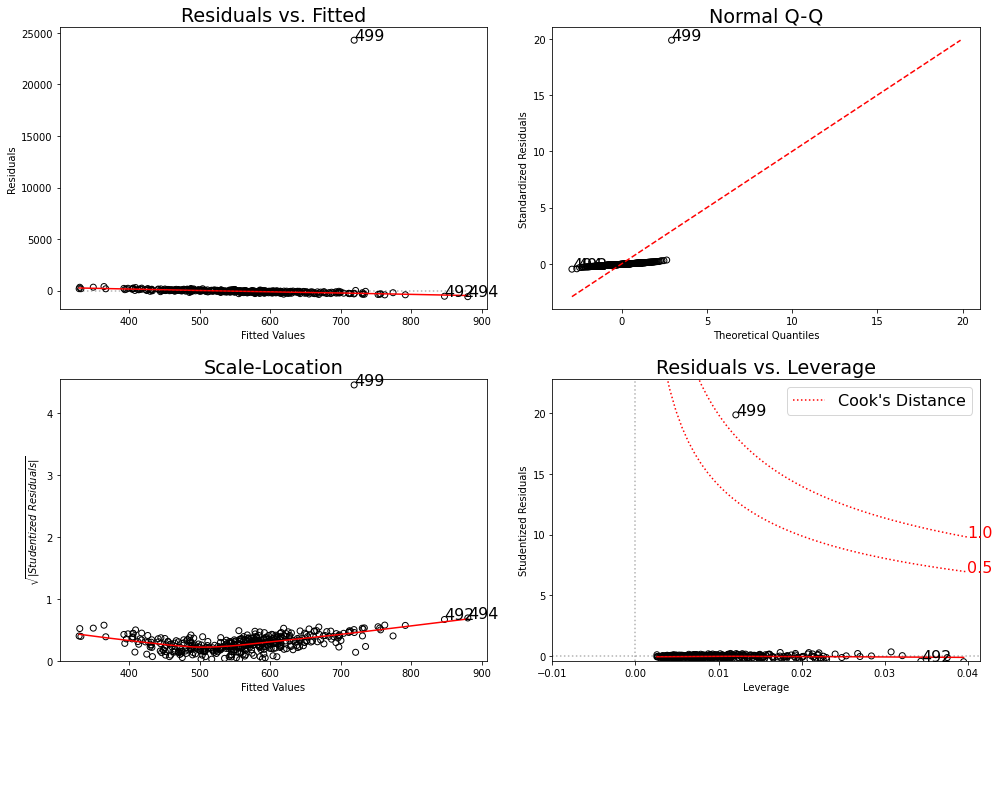

In [ ]:
residual_plots(multiple_reg) #get residual plots of model

## Influential points

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
influence_points = OLSInfluence(results) # results is output from the lm model built earlier

pd.DataFrame(influence_points.influence).describe()

,0
count,400.000000
mean,0.956988
std,25.722210
min,-16.868543
25%,-0.563957
50%,-0.172266
75%,0.208825
max,512.282100


In [ ]:
pd.DataFrame(influence_points.influence)

,0
161,-0.069491
72,-0.016393
246,-0.113881
230,-0.178788
391,-1.361765
...,...
63,2.732043
326,-0.298180
337,-0.933960
11,5.637623


In [ ]:
# removal of influence points using influence value
influence_data = pd.DataFrame(influence_points.influence[influence_points.influence>=1])
customers_clean['influence_value']= influence_points.influence
customers_clean.loc[influence_data.index,].sort_values(['influence_value'], ascending = False).head(10)


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,influence_value
499,32.836941,10.256549,36.143908,0.789520,25006.670580,Male,512.282100
1,34.603311,12.207298,33.913847,6.922689,744.221867,Male,17.485578
9,35.742670,10.889828,35.565436,6.115199,669.987141,Female,7.527929
15,31.945396,12.965761,36.966389,6.076654,657.019924,Female,7.004536
11,33.215472,12.135101,37.142094,5.840506,663.803693,Male,5.637623
5,34.507551,12.893669,37.635756,5.705154,700.917092,Male,5.438439
6,33.302672,13.459222,36.339521,5.566385,689.787604,Female,4.544918
0,34.374258,15.126994,37.157624,5.377594,765.518462,Female,4.537964
17,32.931336,12.732212,35.600821,5.485977,642.101579,Female,3.564229
21,33.871038,12.026925,34.476878,5.493507,637.102448,Male,3.533126


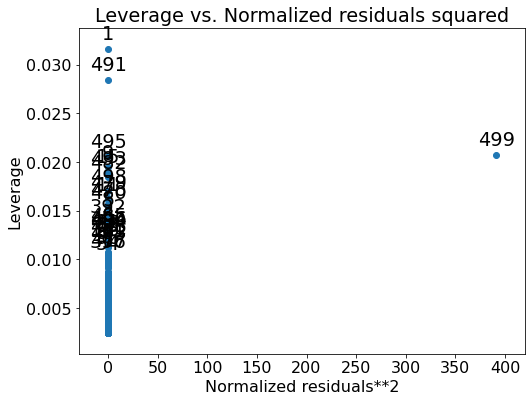

In [ ]:
# leverage vs residual plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

In [ ]:
customers_clean.loc[[0,1,491,499]] #looking at Influential points

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,influence_value
0,34.374258,15.126994,37.157624,5.377594,765.518462,Female,4.537964
1,34.603311,12.207298,33.913847,6.922689,744.221867,Male,17.485578
491,32.904854,12.556108,37.805509,0.269901,314.438518,Male,-16.868543
499,32.836941,10.256549,36.143908,0.789520,25006.670580,Male,512.282100


In [ ]:
customers_clean=customers_clean.drop([0,1,491,499])
#removal of influential points based on above plot

In [ ]:
fig_without_outliers = px.scatter(customers_clean, x="Length of Membership", y="Yearly Amount Spent",trendline="ols")
fig_without_outliers.show() #plot sactter plot between "Length of Membership","Yearly Amount Spent"

Plotting linear model plot (using plotly's scatter) of Yearly Amount Spent vs. Length of Membership before and after removal of outliers

In [ ]:
X = customers_clean.drop(['Yearly Amount Spent'],axis=1)
y = customers_clean['Yearly Amount Spent']  #seperate X and Y

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
# ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
## Spilit the data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
len(y_train)
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))  #length of each split

Y Target Size: 396
X Train Size: 396
X Test  Size: 100
Y Target Size: 100


In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')  #dummification

In [ ]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,influence_value,Gender_Male
149,1.0,31.720770,11.752343,38.573605,5.023934,1.129961,0
20,1.0,35.039283,14.426491,37.374184,3.930615,0.370444,0
453,1.0,33.732648,12.138794,36.853882,1.623420,-4.007092,1
360,1.0,33.122400,11.509048,37.253058,3.182330,-0.386396,1
441,1.0,32.430758,11.306232,37.680403,2.779521,-0.855666,1


In [ ]:
X_train.columns  #get columns of X train

Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'influence_value', 'Gender_Male'],
      dtype='object')

In [ ]:
multiple_reg2 = sm.OLS(y_train, X_train[['const','Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Gender_Male']]).fit()

print(multiple_reg2.summary())  #build a regression model

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     4618.
Date:                 Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                         06:14:24   Log-Likelihood:                -1478.2
No. Observations:                  396   AIC:                             2968.
Df Residuals:                      390   BIC:                             2992.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [ ]:
#get error metrics
scores = get_metrics(y_train,multiple_reg2.predict(X_train[['const','Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Gender_Male']]),y_test,multiple_reg2.predict(X_test[['const','Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Gender_Male']]),"MLR_without_outliers",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041
1,Multiple_Linear_Regression,177.786937,1.496543e+06,1223.332743,25.991178,112.847368,19362.964085,139.150868,23.764964,0.005019
2,MLR_with_all_attributes,229.724320,1.473730e+06,1213.972803,37.417870,174.325335,57371.677489,239.523856,35.573630,0.020186
3,MLR_without_outliers,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390


In [ ]:
#get coefficients
coefficients=coeff("MLR_without_outliers",multiple_reg2.params)
coefficients

,Simple_Linear_Regression,Multiple_Linear_Regression,MLR_with_all_attributes,MLR_without_outliers
const,918.678110,2891.374866,5737.188355,-1030.763995
Length of Membership,-102.591993,NaN,-190.092504,60.745297
Avg. Session Length,NaN,9.789538,-23.624124,25.202609
Time on App,NaN,-65.450086,-112.211093,38.627903
Time on Website,NaN,-50.419727,-59.778983,0.512871
Gender_Male,NaN,NaN,-310.159823,-3.834851


In [ ]:
from scipy import stats

## Standardizing the data 



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler() #importing Scaler

In [ ]:
num_vars = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'] #defining Numerical variable 

In [ ]:
X = customers_clean.drop(['Yearly Amount Spent','influence_value'],axis=1)
y = customers_clean['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #train test split

In [ ]:
X_train.head() #snapshot of X train

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Gender
45,33.501370,13.898082,37.058913,4.130563,Female
38,33.265444,13.052210,38.775665,4.574288,Female
163,34.655486,10.338073,36.157256,4.396652,Female
93,33.918844,12.428737,37.305362,4.158215,Female
459,31.047222,11.199661,38.688709,3.088764,Male


In [ ]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

print(X_train.head()) 
#Scaling

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
45              0.458014     1.858102        -0.037990              0.640420   
38              0.223704     1.004436         1.688249              1.083185   
163             1.604223    -1.734714        -0.944629              0.905933   
93              0.872628     0.375217         0.209821              0.668012   
459            -1.979323    -0.865186         1.600812             -0.399125   

     Gender  
45   Female  
38   Female  
163  Female  
93   Female  
459    Male  


In [ ]:
# adding the Constant term
X_train = sm.add_constant(X_train)
print(X_train.head())

X_test = sm.add_constant(X_test)
#X_test.head()

     const  Avg. Session Length  Time on App  Time on Website  \
45     1.0             0.458014     1.858102        -0.037990   
38     1.0             0.223704     1.004436         1.688249   
163    1.0             1.604223    -1.734714        -0.944629   
93     1.0             0.872628     0.375217         0.209821   
459    1.0            -1.979323    -0.865186         1.600812   

     Length of Membership  Gender  
45               0.640420  Female  
38               1.083185  Female  
163              0.905933  Female  
93               0.668012  Female  
459             -0.399125    Male  


In [ ]:
y_train[:10] #snapshot of Y train

45     596.430173
38     608.271817
163    533.514935
93     565.994363
459    392.497399
385    442.667252
116    553.994674
337    466.421199
297    482.602467
145    541.049831
Name: Yearly Amount Spent, dtype: float64

In [ ]:
X_train[:10] #snapshot of X train

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Gender
45,1.0,0.458014,1.858102,-0.037990,0.640420,Female
38,1.0,0.223704,1.004436,1.688249,1.083185,Female
163,1.0,1.604223,-1.734714,-0.944629,0.905933,Female
93,1.0,0.872628,0.375217,0.209821,0.668012,Female
459,1.0,-1.979323,-0.865186,1.600812,-0.399125,Male
385,1.0,0.854136,-1.110294,0.171125,-0.534926,Male
116,1.0,1.152394,0.616492,0.392513,0.212407,Female
337,1.0,0.522672,0.180360,0.181879,-0.954641,Male
297,1.0,-0.326824,0.271827,-0.425152,-0.138176,Male
145,1.0,1.472665,-0.657177,-0.722392,0.551295,Female


In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8') #dummification

## Build a Multiple Linear regression after standardizing Data i.e., Dummification & Standard Scaler

In [ ]:
multiple_reg3= sm.OLS(y_train, X_train).fit()
print(multiple_reg3.summary()) #build a regression model

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     4618.
Date:                 Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                         06:14:24   Log-Likelihood:                -1478.2
No. Observations:                  396   AIC:                             2968.
Df Residuals:                      390   BIC:                             2992.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

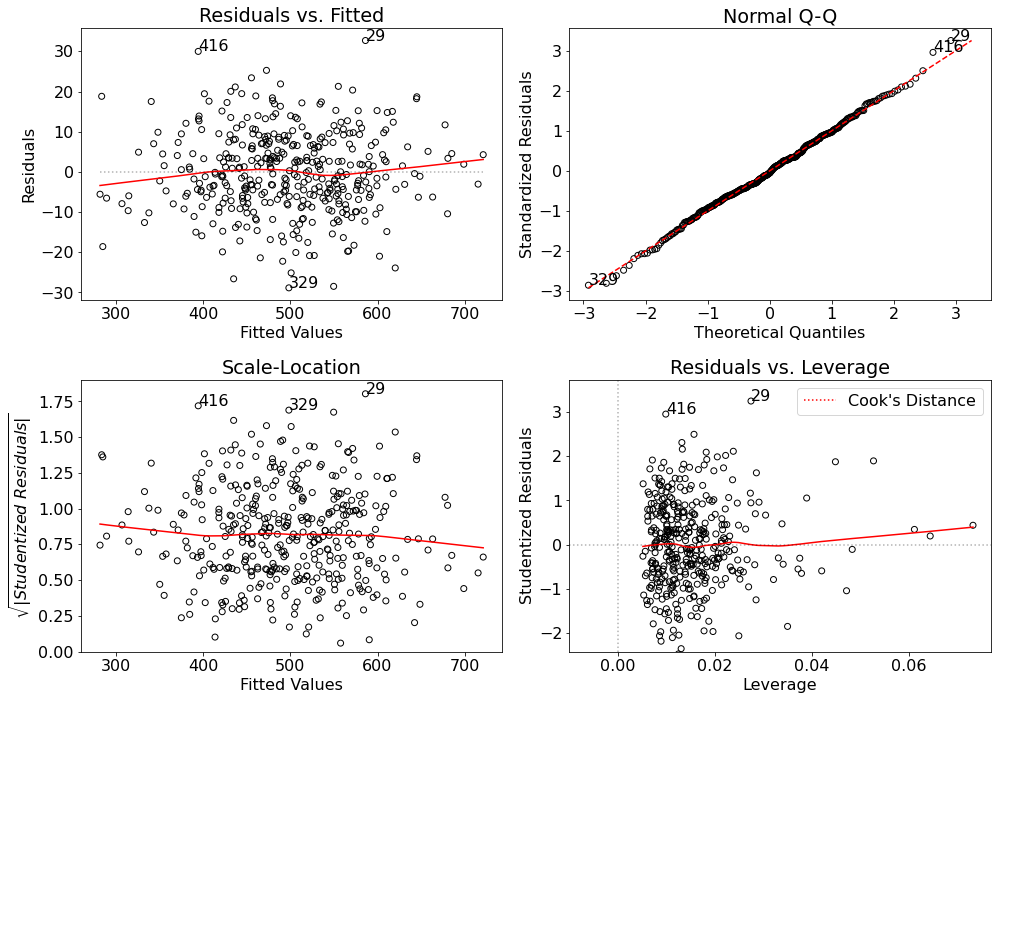

In [ ]:
residual_plots(multiple_reg3) #Get residual plots

In [ ]:
#get error metrics
scores = get_metrics(y_train,multiple_reg3.predict( X_train),y_test,multiple_reg3.predict(X_test),"MLR_after_standardization",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041
1,Multiple_Linear_Regression,177.786937,1.496543e+06,1223.332743,25.991178,112.847368,19362.964085,139.150868,23.764964,0.005019
2,MLR_with_all_attributes,229.724320,1.473730e+06,1213.972803,37.417870,174.325335,57371.677489,239.523856,35.573630,0.020186
3,MLR_without_outliers,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390
4,MLR_after_standardization,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390


In [ ]:
#get coefficients
coefficients=coeff("MLR_after_standardization",multiple_reg3.params)
coefficients

,Simple_Linear_Regression,Multiple_Linear_Regression,MLR_with_all_attributes,MLR_without_outliers,MLR_after_standardization
const,918.678110,2891.374866,5737.188355,-1030.763995,498.620969
Length of Membership,-102.591993,NaN,-190.092504,60.745297,60.876979
Avg. Session Length,NaN,9.789538,-23.624124,25.202609,25.376443
Time on App,NaN,-65.450086,-112.211093,38.627903,38.275180
Time on Website,NaN,-50.419727,-59.778983,0.512871,0.510052
Gender_Male,NaN,NaN,-310.159823,-3.834851,-3.834851


## Model refinement - Using Sequential Feature selection


In [ ]:
# Python style of Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lin_model=lm.fit(X_train,y_train)

In [ ]:
train_pred = lin_model.predict(X_train)
test_pred = lin_model.predict(X_test)

In [ ]:
train_pred[:5]

array([620.3303746 , 609.54486721, 527.60263807, 575.90021468,
       387.96174821])


## Multi-collinearity

In [ ]:
customers_clean.head() #get snapshot of clean data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,influence_value
2,33.256335,13.858062,37.780265,5.976768,725.584814,Male,NaN
3,34.967610,13.919494,37.952013,5.066697,712.396327,Female,2.718982
4,34.385820,12.729720,36.232110,5.705941,708.935185,Female,NaN
5,34.507551,12.893669,37.635756,5.705154,700.917092,Male,5.438439
6,33.302672,13.459222,36.339521,5.566385,689.787604,Female,4.544918


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #import VIF

In [ ]:
customers_clean=customers_clean.drop(['influence_value'],axis=1) #drop influence value

In [ ]:
customers_clean=pd.get_dummies(customers_clean,drop_first=True,dtype='int8') #dummification

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = customers_clean.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(customers_clean.values, i)
                          for i in range(len(customers_clean.columns))]
  
print(vif_data) #print VIF data

                feature          VIF
0   Avg. Session Length   956.917592
1           Time on App   505.675740
2       Time on Website  1213.253428
3  Length of Membership   112.910828
4   Yearly Amount Spent   613.965807
5           Gender_Male     4.293123


In [ ]:
vif_data.sort_values(by='VIF',ascending=False) #sort VIF data

,feature,VIF
2,Time on Website,1213.253428
0,Avg. Session Length,956.917592
4,Yearly Amount Spent,613.965807
1,Time on App,505.675740
3,Length of Membership,112.910828
5,Gender_Male,4.293123


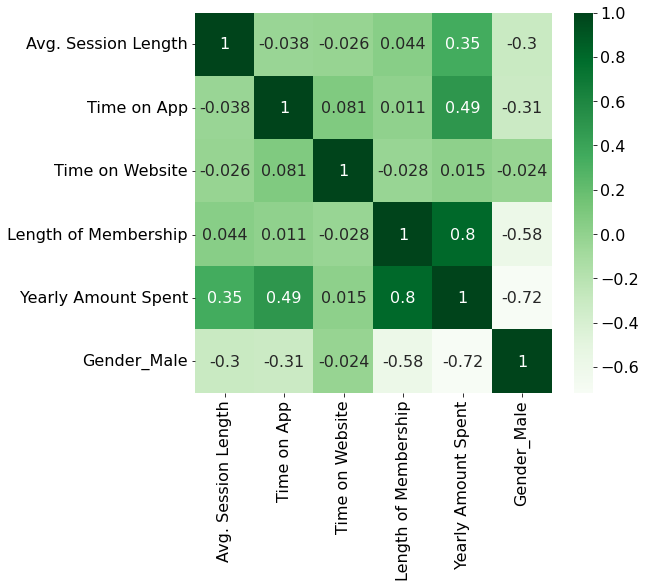

In [ ]:
sns.heatmap(customers_clean.corr(),annot=True,cmap='Greens') #plot correlation plot

# Example

In [ ]:
customers_clean_VIF=customers_clean.drop(["Avg. Session Length","Time on Website"],axis=1) 

In [ ]:
X_VIF = customers_clean_VIF.drop(['Yearly Amount Spent'],axis=1)
y_VIF = customers_clean_VIF['Yearly Amount Spent']

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Spilit the data into Training and Testing Data
X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF = train_test_split(X_VIF, y_VIF, test_size=0.2, random_state=101)

len(y_train)
print('Y Target Size:', len(y_train_VIF))
print('X Train Size:', len(X_train_VIF))
print('X Test  Size:', len(X_test_VIF))
print('Y Target Size:', len(y_test_VIF))


# adding the Constant term
X_train_VIF= sm.add_constant(X_train_VIF)
X_test_VIF= sm.add_constant(X_test_VIF)


Y Target Size: 396
X Train Size: 396
X Test  Size: 100
Y Target Size: 100


In [ ]:
multiple_reg_VIF= sm.OLS(y_train_VIF, X_train_VIF).fit()
print(multiple_reg_VIF.summary())#build regression model

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.893
Model:                             OLS   Adj. R-squared:                  0.892
Method:                  Least Squares   F-statistic:                     1089.
Date:                 Wed, 01 Feb 2023   Prob (F-statistic):          1.15e-189
Time:                         06:14:26   Log-Likelihood:                -1847.4
No. Observations:                  396   AIC:                             3703.
Df Residuals:                      392   BIC:                             3719.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

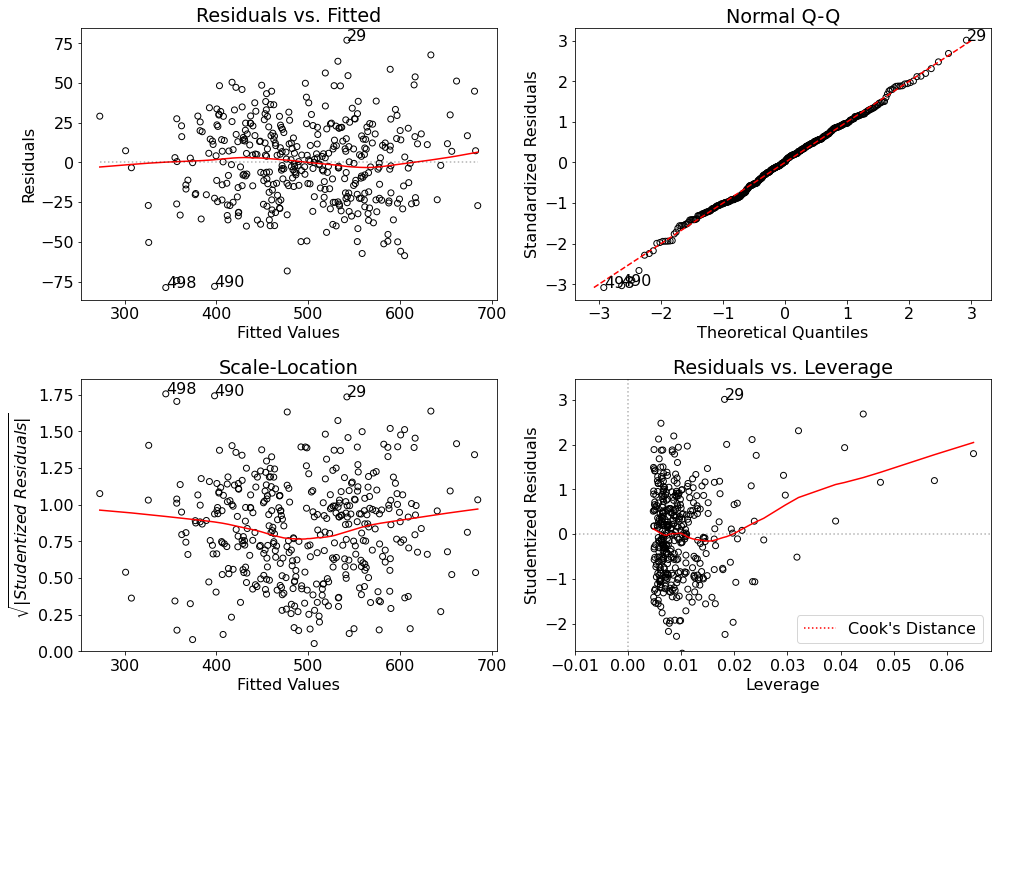

In [ ]:
residual_plots(multiple_reg_VIF)#get residual plot

In [ ]:
#get error metrics
scores = get_metrics(y_train_VIF,multiple_reg_VIF.predict( X_train_VIF),y_test_VIF,multiple_reg_VIF.predict(X_test_VIF),"MLR_using_VIF",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041
1,Multiple_Linear_Regression,177.786937,1.496543e+06,1223.332743,25.991178,112.847368,19362.964085,139.150868,23.764964,0.005019
2,MLR_with_all_attributes,229.724320,1.473730e+06,1213.972803,37.417870,174.325335,57371.677489,239.523856,35.573630,0.020186
3,MLR_without_outliers,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390
4,MLR_after_standardization,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390
5,MLR_using_VIF,20.706849,6.600732e+02,25.691891,4.321141,19.292051,529.223183,23.004851,3.793593,0.892840


In [ ]:
#get coefficients
coefficients=coeff("MLR_using_VIF",multiple_reg_VIF.params)
coefficients

,Simple_Linear_Regression,Multiple_Linear_Regression,MLR_with_all_attributes,MLR_without_outliers,MLR_after_standardization,MLR_using_VIF
const,918.678110,2891.374866,5737.188355,-1030.763995,498.620969,-87.206652
Length of Membership,-102.591993,NaN,-190.092504,60.745297,60.876979,54.776742
Avg. Session Length,NaN,9.789538,-23.624124,25.202609,25.376443,NaN
Time on App,NaN,-65.450086,-112.211093,38.627903,38.275180,33.825784
Time on Website,NaN,-50.419727,-59.778983,0.512871,0.510052,NaN
Gender_Male,NaN,NaN,-310.159823,-3.834851,-3.834851,-28.209603


## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE #import RFE

In [ ]:
indp_vars = X
min_aic = 10**100 # initiailizing AIC to a very large value 
for i in range(indp_vars.shape[1],0,-1):
    regression_model = LinearRegression()
    rfe = RFE(regression_model, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)
    chk = X_train.loc[:,list(rfe.support_)]
    print(chk.columns)
    regression_model=sm.OLS(y_train,chk)
    result=regression_model.fit()
    current_aic = result.aic
    print(current_aic)
    if(current_aic <= min_aic):
        min_aic = current_aic
        bestmodel = chk.columns
    else:
        print("Break !")
        break

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')
5573.33108354937
Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Gender_Male'],
      dtype='object')
5571.337574786054
Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')
6046.465991660568
Break !


In [ ]:
bestmodel_data = X_train.loc[:,bestmodel]
bestmodel_data_test = X_test.loc[:,bestmodel]
bestmodel_data['const'] =1
bestmodel_data_test['const'] =1
bestmodel_data.head() #splitt data using bestmodel data

,Avg. Session Length,Time on App,Length of Membership,Gender_Male,const
45,0.458014,1.858102,0.640420,0,1
38,0.223704,1.004436,1.083185,0,1
163,1.604223,-1.734714,0.905933,0,1
93,0.872628,0.375217,0.668012,0,1
459,-1.979323,-0.865186,-0.399125,1,1


In [ ]:
y_test.shape #shape of Y test

(100,)

In [ ]:
regression_model=sm.OLS(y_train,bestmodel_data).fit()
print(regression_model.summary2()) #build a regression model

                    Results: Ordinary least squares
Model:               OLS                  Adj. R-squared:      0.983    
Dependent Variable:  Yearly Amount Spent  AIC:                 2967.4944
Date:                2023-02-01 06:14     BIC:                 2987.4015
No. Observations:    396                  Log-Likelihood:      -1478.7  
Df Model:            4                    F-statistic:         5772.    
Df Residuals:        391                  Prob (F-statistic):  0.00     
R-squared:           0.983                Scale:               103.88   
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Avg. Session Length   25.3717   0.5504  46.1002 0.0000  24.2897  26.4538
Time on App           38.3195   0.5611  68.2884 0.0000  37.2162  39.4227
Length of Membership  60.8659   0.6634  91.7454 0.0000  59.5616  62.1702

In [ ]:
#get error metrics
scores = get_metrics(y_train,regression_model.predict(bestmodel_data),y_test,regression_model.predict(bestmodel_data_test),"MLR_after_RFE",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple_Linear_Regression,204.237188,1.493502e+06,1222.089248,32.083611,130.817517,29674.042192,172.261552,27.899321,0.007041
1,Multiple_Linear_Regression,177.786937,1.496543e+06,1223.332743,25.991178,112.847368,19362.964085,139.150868,23.764964,0.005019
2,MLR_with_all_attributes,229.724320,1.473730e+06,1213.972803,37.417870,174.325335,57371.677489,239.523856,35.573630,0.020186
3,MLR_without_outliers,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390
4,MLR_after_standardization,8.079283,1.023118e+02,10.114928,1.677773,7.092631,81.026926,9.001496,1.376306,0.983390
5,MLR_using_VIF,20.706849,6.600732e+02,25.691891,4.321141,19.292051,529.223183,23.004851,3.793593,0.892840
6,MLR_after_RFE,8.111494,1.025698e+02,10.127673,1.684749,7.024466,80.518039,8.973184,1.367727,0.983348


In [ ]:
#get coefficients
coefficients=coeff("MLR_after_RFE",regression_model.params)
coefficients

,Simple_Linear_Regression,Multiple_Linear_Regression,MLR_with_all_attributes,MLR_without_outliers,MLR_after_standardization,MLR_using_VIF,MLR_after_RFE
const,918.678110,2891.374866,5737.188355,-1030.763995,498.620969,-87.206652,498.623003
Length of Membership,-102.591993,NaN,-190.092504,60.745297,60.876979,54.776742,60.865926
Avg. Session Length,NaN,9.789538,-23.624124,25.202609,25.376443,NaN,25.371730
Time on App,NaN,-65.450086,-112.211093,38.627903,38.275180,33.825784,38.319465
Time on Website,NaN,-50.419727,-59.778983,0.512871,0.510052,NaN,NaN
Gender_Male,NaN,NaN,-310.159823,-3.834851,-3.834851,-28.209603,-3.838632


# END